In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 課題1
df_iris = sns.load_dataset("iris")
df_iris = df_iris.loc[df_iris["species"].isin (["versicolor", "virginica"]), ["sepal_length", "petal_length", "species"]]
print(df_iris.shape)

(100, 3)


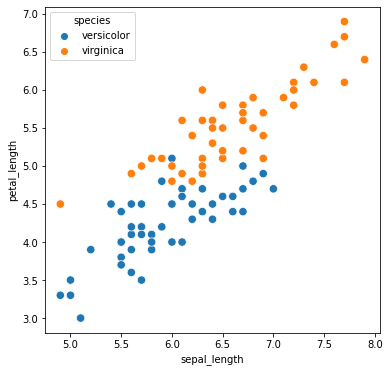

In [3]:
# 問題2
plt.figure(figsize=(6,6))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', s=70, data=df_iris)
plt.show()

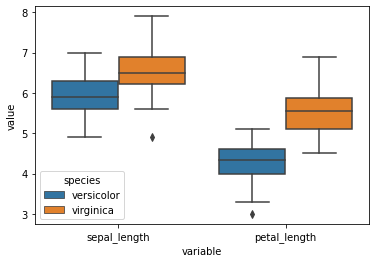

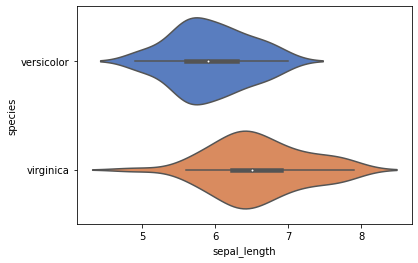

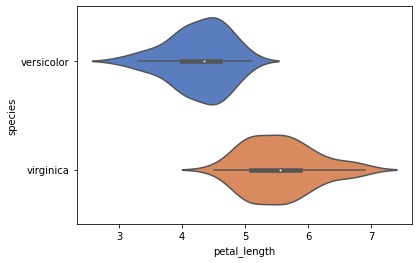

In [4]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_iris, id_vars=['species']), hue="species")
plt.show()
sns.violinplot(x="sepal_length", y="species", data=df_iris, palette="muted")
plt.show()
sns.violinplot(x="petal_length", y="species", data=df_iris, palette="muted")
plt.show()

In [5]:
# 問題3
X = df_iris.loc[:, ["sepal_length", "petal_length"]]
y = df_iris["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
# サイズ確認
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(75, 2) (25, 2) (75,) (25,)


In [6]:
# 問題4 X_trainでfitして、X_train、X_testに対してtransform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# 問題5
from sklearn.neighbors import KNeighborsClassifier
# 5-nn
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh.predict(X_test)

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor'], dtype=object)

In [8]:
# 3-nn
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.predict(X_test)

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor'], dtype=object)

In [9]:
# 1-nn
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
neigh.predict(X_test)

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

In [10]:
# 問題6
from sklearn.metrics import classification_report
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
# 4種類の指標
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# 混同行列
print("混同行列: \n{}".format(confusion_matrix(y_test, y_pred)))
#  正解率
print("正解率: {}".format(accuracy_score(y_test, y_pred)))
print("適合率: {}".format(precision_score(y_test.values, y_pred, average='macro')))
print("再現率: {}".format(recall_score(y_test.values, y_pred, average='macro')))
print("F値: {}".format(f1_score(y_test.values, y_pred, average='macro')))

              precision    recall  f1-score   support

  versicolor       0.76      1.00      0.87        13
   virginica       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25

混同行列: 
[[13  0]
 [ 4  8]]
正解率: 0.84
適合率: 0.8823529411764706
再現率: 0.8333333333333333
F値: 0.8333333333333333


### それぞれの説明、計算例はversicolorに対する各値の値
- 正解率: 正解した数/ 事例数
0.84 = (13 + 8) / (13 + 0 + 4 + 8)

- 適合率: 分母の数の中で正解した数 / モデルが真と予測した数
0.76 = (13) / (13 + 4)

- 再現率: 分母の数の中で正解した数 / 正解データの中の真の数
1.0 =  (13) / (13 + 0)
 
- F1値: 適合率と再現率の調和平均
0.86 =  (2 * 0.76 * 1.0) / (0.76 + 1.0)

`precision_score(y_test.values, y_pred, average='macro')`
は、versicolor、virginicaそれぞれの適合率の平均値
0.88 = (0.76 + 1.0) / 2
他の_scoreもそれぞれの平均

In [11]:
### 各ハイパーパラメータの値での結果比較
# n_neighbors=1
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("n_neighbors=1 \n")
print("confusion_matrix \n {}".format(confusion_matrix(y_test, y_pred)))
print("classification_report \n {}".format(classification_report(y_test, y_pred)))
# n_neighbors=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("n_neighbors=3 \n")
print("confusion_matrix \n {}".format(confusion_matrix(y_test, y_pred)))
print("classification_report \n {}".format(classification_report(y_test, y_pred)))
# n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print("n_neighbors=5 \n ")
print("confusion_matrix \n {}".format(confusion_matrix(y_test, y_pred)))
print("classification_report \n {}".format(classification_report(y_test, y_pred)))

print("今回のデータに対しては、n_neighbors=1の時が最もより分類ができた")

n_neighbors=1 

confusion_matrix 
 [[13  0]
 [ 3  9]]
classification_report 
               precision    recall  f1-score   support

  versicolor       0.81      1.00      0.90        13
   virginica       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

n_neighbors=3 

confusion_matrix 
 [[13  0]
 [ 4  8]]
classification_report 
               precision    recall  f1-score   support

  versicolor       0.76      1.00      0.87        13
   virginica       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25

n_neighbors=5 
 
confusion_matrix 
 [[13  0]
 [ 4  8]]
classification_report 
               precision    recall  f1-score   support

  versicolor       0.76      1.00      0.87        13
  

In [12]:
# 問題7
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [13]:
y_train_number_label  = y_train.replace('versicolor', 0).replace('virginica', 1)
y_test_number_label  = y_test.replace('versicolor', 0).replace('virginica', 1)

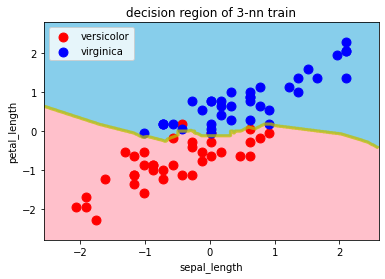

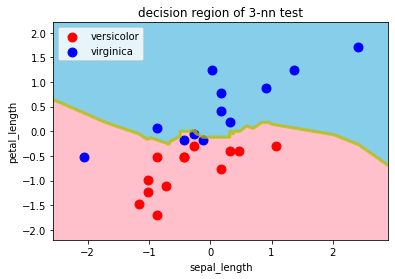

In [14]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train_number_label)
decision_region(X_train, y_train_number_label, neigh, step=0.01, title='decision region of 3-nn train', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])
decision_region(X_test, y_test_number_label, neigh, step=0.01, title='decision region of 3-nn test', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])

In [15]:
# 問題8
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def predict_and_display_result(X_train, y_train, X_test, y_test, model, model_name):
    print('------ {} --------'.format(model_name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("confusion_matrix \n {}".format(confusion_matrix(y_test, y_pred)))
    print("classification_report \n {}".format(classification_report(y_test, y_pred)))
    decision_region(X_train, y_train, model, step=0.01, title="decision region of {} train".format(model_name), xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])
    decision_region(X_test, y_test, model, step=0.01, title="decision region of {} test".format(model_name), xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])
    d = classification_report(y_test, y_pred, output_dict=True)
    return pd.DataFrame([dict(d["macro avg"], **{"accuracy": d["accuracy"]})], index=[model_name])

def compare_models(X_train, y_train, X_test, y_test):
    # 5-nn
    five_nn_result = predict_and_display_result(X_train, y_train, X_test, y_test, KNeighborsClassifier(), "5-nn")
    lr_result = predict_and_display_result(X_train, y_train, X_test, y_test, LogisticRegression(), "Logistic Regression")
    svm_result = predict_and_display_result(X_train, y_train, X_test, y_test, SVC(), "SVM")
    dt_result = predict_and_display_result(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), "Decision Tree")
    rf_result = predict_and_display_result(X_train, y_train, X_test, y_test, RandomForestClassifier(), "random forest")
    return pd.concat([five_nn_result, lr_result, svm_result, dt_result, rf_result])

------ 5-nn --------
confusion_matrix 
 [[13  0]
 [ 4  8]]
classification_report 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25



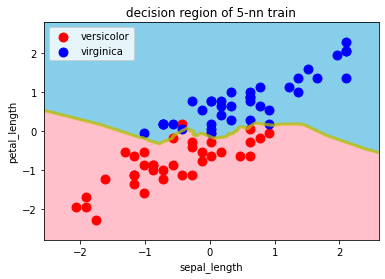

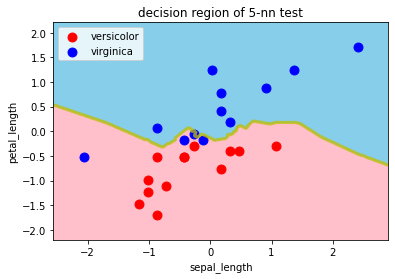

------ Logistic Regression --------
confusion_matrix 
 [[13  0]
 [ 4  8]]
classification_report 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25



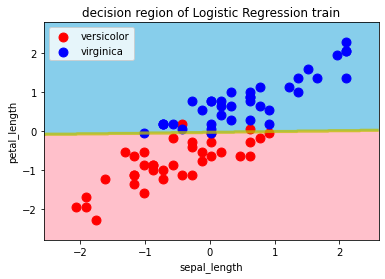

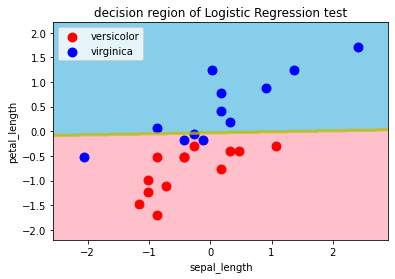

------ SVM --------
confusion_matrix 
 [[13  0]
 [ 3  9]]
classification_report 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



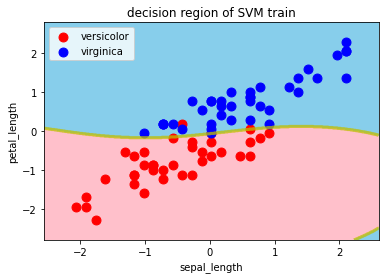

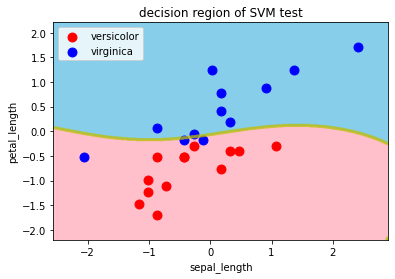

------ Decision Tree --------
confusion_matrix 
 [[13  0]
 [ 4  8]]
classification_report 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25



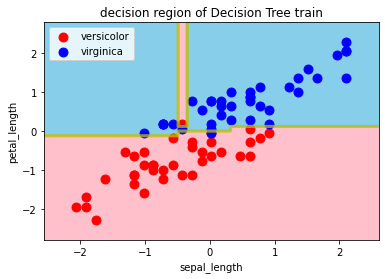

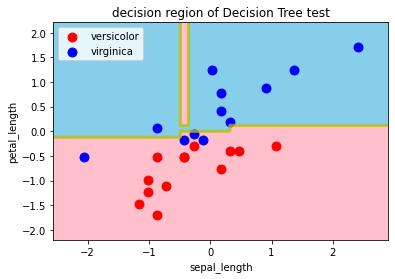

------ random forest --------
confusion_matrix 
 [[13  0]
 [ 3  9]]
classification_report 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



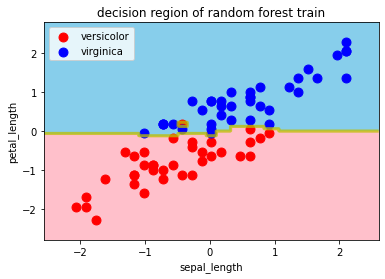

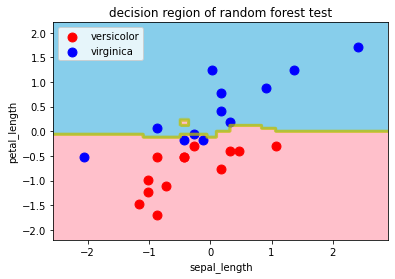

,precision,recall,f1-score,support,accuracy
5-nn,0.882353,0.833333,0.833333,25,0.84
Logistic Regression,0.882353,0.833333,0.833333,25,0.84
SVM,0.906250,0.875000,0.876847,25,0.88
Decision Tree,0.882353,0.833333,0.833333,25,0.84
random forest,0.906250,0.875000,0.876847,25,0.88


In [16]:
y_train_number_label  = y_train.replace('versicolor', 0).replace('virginica', 1)
y_test_number_label  = y_test.replace('versicolor', 0).replace('virginica', 1)
compare_result = compare_models(X_train, y_train_number_label, X_test, y_test_number_label)
compare_result

### 結果
SVMと決定技が各値とも最も良い高い値を示した。ただし、両者とも決定領域を見ると
SVMは右下のあたりに青領域があり、その辺りにデータがないのでなんとも言えないが、sepal_lengthが大きいのはvirginicaに多いのでその辺りが考慮されたのではないかと思われる。
決定木に関しては決定領域に横に伸びる線に加えて、イレギュラーに縦長の線に囲まれた領域がありこれは正しくないように見える。今回のデータでは値としてはいいが、別のテストデータを使うと明らかな誤分類が増える可能性が高そう。

ただし、他のモデルに関しても混同行列より誤分類ひとつ分の差なので必ずしも悪かったとは言えない。

In [17]:
# 問題9
# 標準化前のデータを再度作成
X = df_iris.loc[:, ["sepal_length", "petal_length"]]
y = df_iris["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(75, 2) (25, 2) (75,) (25,)


------ 5-nn --------
confusion_matrix 
 [[13  0]
 [ 4  8]]
classification_report 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25



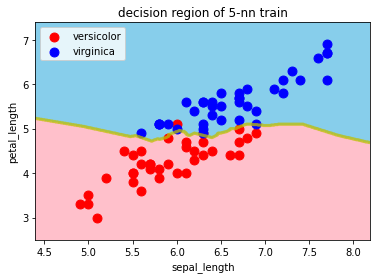

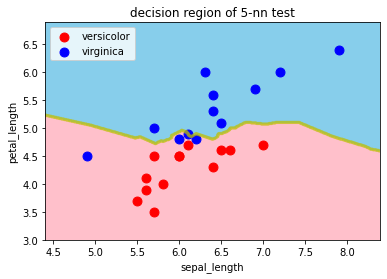

------ Logistic Regression --------
confusion_matrix 
 [[13  0]
 [ 4  8]]
classification_report 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25



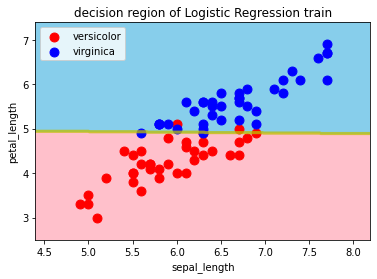

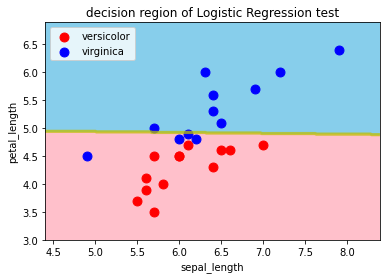

------ SVM --------
confusion_matrix 
 [[13  0]
 [ 3  9]]
classification_report 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



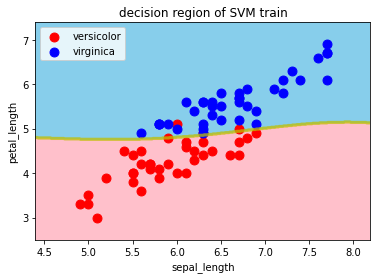

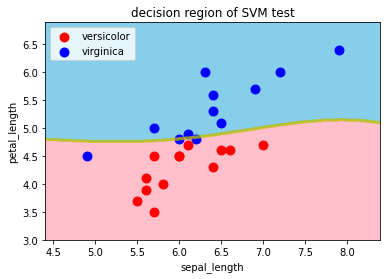

------ Decision Tree --------
confusion_matrix 
 [[13  0]
 [ 4  8]]
classification_report 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25



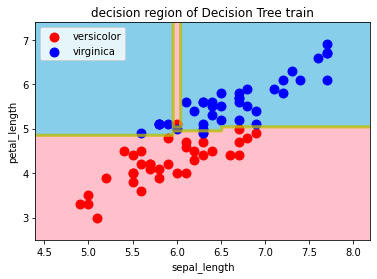

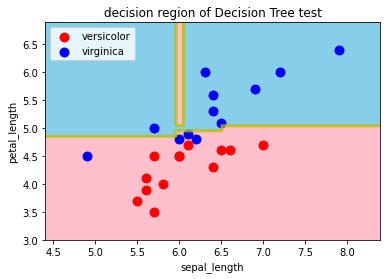

------ random forest --------
confusion_matrix 
 [[13  0]
 [ 4  8]]
classification_report 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25



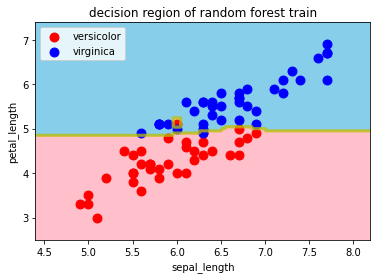

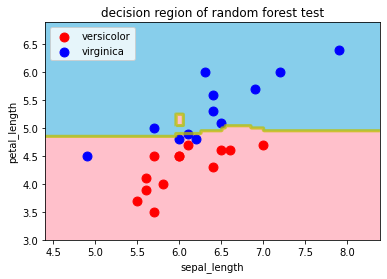

,precision,recall,f1-score,support,accuracy
5-nn,0.882353,0.833333,0.833333,25,0.84
Logistic Regression,0.882353,0.833333,0.833333,25,0.84
SVM,0.906250,0.875000,0.876847,25,0.88
Decision Tree,0.882353,0.833333,0.833333,25,0.84
random forest,0.882353,0.833333,0.833333,25,0.84


In [18]:
y_train_number_label  = y_train.replace('versicolor', 0).replace('virginica', 1)
y_test_number_label  = y_test.replace('versicolor', 0).replace('virginica', 1)
compare_result = compare_models(X_train.to_numpy(), y_train_number_label, X_test.to_numpy(), y_test_number_label)
compare_result

### 標準化しなかった場合の結果
標準化した場合同様、SVMが良い値を示した。値的や行列も変わらない。
SVMの決定領域は、直線に近くなり、右下の青領域は無くなった。
標準化により、sepal_lengthとpetal_lengthの最大最小の幅は変わらなくなったが、元々かけ離れた値ではなかったため、結果への影響は小さかったのかもしれない。

In [46]:
# 問題10
def decision_3_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3

    # pred

    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
def predict_and_display_result_var_3(X_train, y_train, X_test, y_test, model, model_name):
    print('------ {} --------'.format(model_name))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("confusion_matrix \n {}".format(confusion_matrix(y_test, y_pred)))
    print("classification_report \n {}".format(classification_report(y_test, y_pred)))
    decision_3_region(X_train, y_train, model, step=0.01, title="decision region of {} train".format(model_name), xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica', 'setosa'])
    decision_3_region(X_test, y_test, model, step=0.01, title="decision region of {} test".format(model_name), xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica', 'setosa'])
    d = classification_report(y_test, y_pred, output_dict=True)
    return pd.DataFrame([dict(d["macro avg"], **{"accuracy": d["accuracy"]})], index=[model_name])

def compare_models_var_3(X_train, y_train, X_test, y_test):
    # 5-nn
    five_nn_result = predict_and_display_result_var_3(X_train, y_train, X_test, y_test, KNeighborsClassifier(), "5-nn")
    lr_result = predict_and_display_result_var_3(X_train, y_train, X_test, y_test, LogisticRegression(), "Logistic Regression")
    svm_result = predict_and_display_result_var_3(X_train, y_train, X_test, y_test, SVC(), "SVM")
    dt_result = predict_and_display_result_var_3(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), "Decision Tree")
    rf_result = predict_and_display_result_var_3(X_train, y_train, X_test, y_test, RandomForestClassifier(), "random forest")
    return pd.concat([five_nn_result, lr_result, svm_result, dt_result, rf_result])

In [47]:
df_iris = sns.load_dataset("iris")
df_iris = df_iris.loc[:, ["sepal_length", "petal_length", "species"]]
X = df_iris.loc[:, ["sepal_length", "petal_length"]]
y = df_iris["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(112, 2) (38, 2) (112,) (38,)


------ 5-nn --------
confusion_matrix 
 [[ 7  1  0]
 [ 3 11  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.92      0.79      0.85        14
           2       1.00      1.00      1.00        16

    accuracy                           0.89        38
   macro avg       0.87      0.89      0.87        38
weighted avg       0.91      0.89      0.90        38



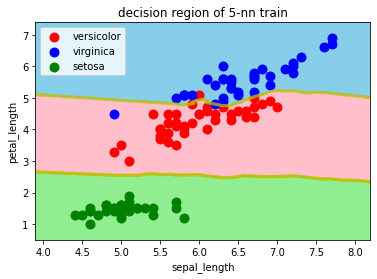

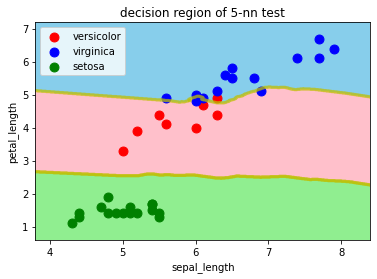

------ Logistic Regression --------
confusion_matrix 
 [[ 8  0  0]
 [ 1 13  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        16

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



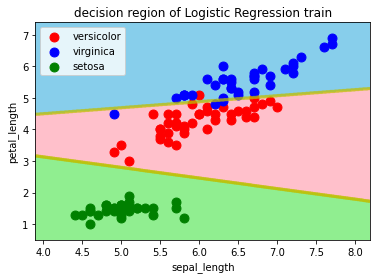

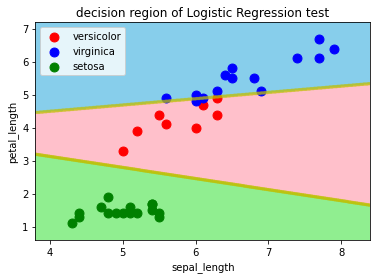

------ SVM --------
confusion_matrix 
 [[ 8  0  0]
 [ 3 11  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.79      0.88        14
           2       1.00      1.00      1.00        16

    accuracy                           0.92        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.94      0.92      0.92        38



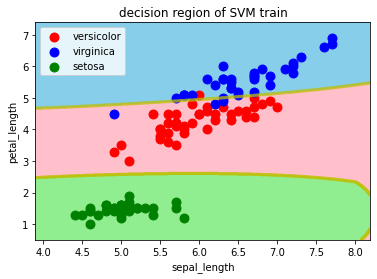

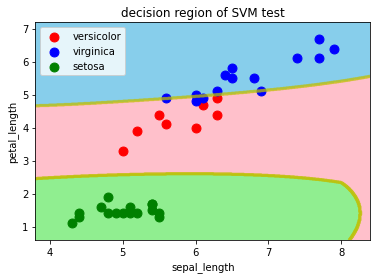

------ Decision Tree --------
confusion_matrix 
 [[ 7  1  0]
 [ 1 13  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        16

    accuracy                           0.95        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.95      0.95      0.95        38



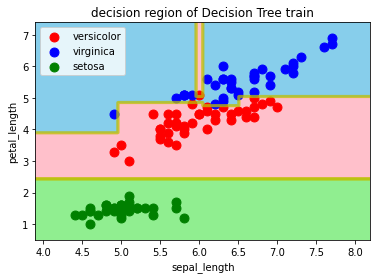

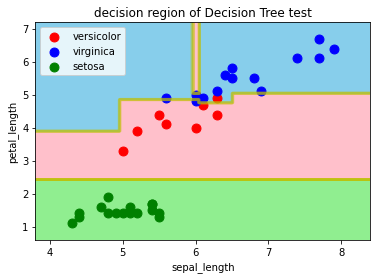

------ random forest --------
confusion_matrix 
 [[ 7  1  0]
 [ 4 10  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.91      0.71      0.80        14
           2       1.00      1.00      1.00        16

    accuracy                           0.87        38
   macro avg       0.85      0.86      0.85        38
weighted avg       0.89      0.87      0.87        38



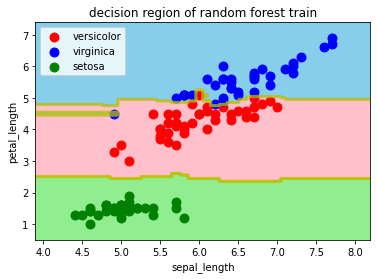

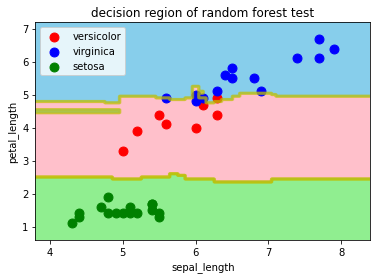

,precision,recall,f1-score,support,accuracy
5-nn,0.872222,0.886905,0.874644,38,0.894737
Logistic Regression,0.962963,0.976190,0.968046,38,0.973684
SVM,0.909091,0.928571,0.907368,38,0.921053
Decision Tree,0.934524,0.934524,0.934524,38,0.947368
random forest,0.848485,0.863095,0.845614,38,0.868421


In [49]:
y_train_number_label  = y_train.replace('versicolor', 0).replace('virginica', 1).replace('setosa', 2)
y_test_number_label  = y_test.replace('versicolor', 0).replace('virginica', 1).replace('setosa', 2)

compare_result = compare_models_var_3(X_train.to_numpy(), y_train_number_label, X_test.to_numpy(), y_test_number_label)
compare_result

### 3種類のアヤメ分類の結果
- ロジスティック回帰が全ての数値で良い結果となった。
- setosaの分割に関しては、100%分割できている。
- SVMも良さそうに見えるが、今回はロジスティック回帰の方がversicolorとvirginicaの間に後分類の少ない決定領域を引くことができるているように見える。
- 決定木、ランダムフォレストは、いくつか不安定な決定領域が生まれがち。

------ 5-nn --------
confusion_matrix 
 [[ 7  1  0]
 [ 4 10  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.91      0.71      0.80        14
           2       1.00      1.00      1.00        16

    accuracy                           0.87        38
   macro avg       0.85      0.86      0.85        38
weighted avg       0.89      0.87      0.87        38



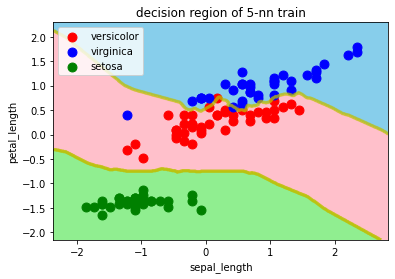

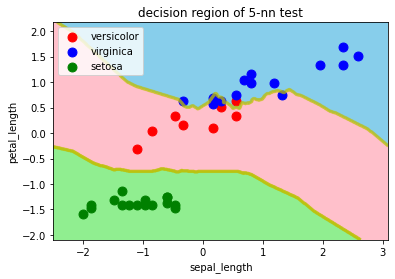

------ Logistic Regression --------
confusion_matrix 
 [[ 8  0  0]
 [ 3 11  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.79      0.88        14
           2       1.00      1.00      1.00        16

    accuracy                           0.92        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.94      0.92      0.92        38



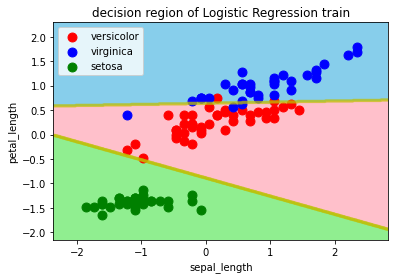

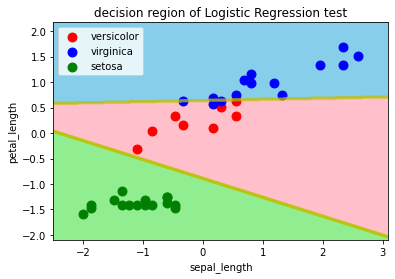

------ SVM --------
confusion_matrix 
 [[ 8  0  0]
 [ 4 10  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       1.00      0.71      0.83        14
           2       1.00      1.00      1.00        16

    accuracy                           0.89        38
   macro avg       0.89      0.90      0.88        38
weighted avg       0.93      0.89      0.90        38



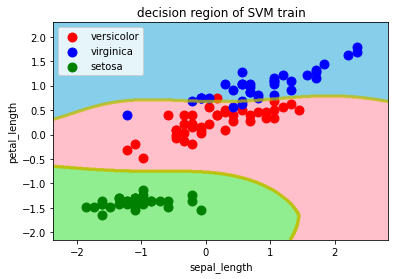

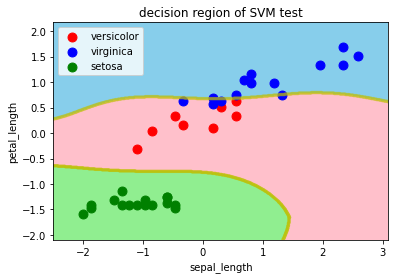

------ Decision Tree --------
confusion_matrix 
 [[ 7  1  0]
 [ 1 13  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        16

    accuracy                           0.95        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.95      0.95      0.95        38



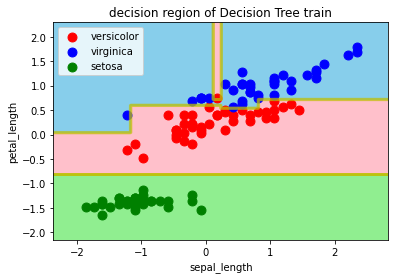

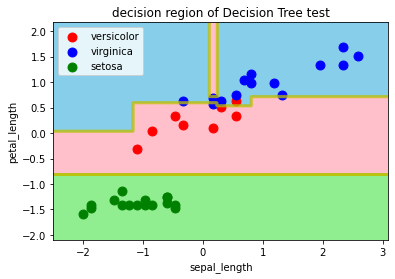

------ random forest --------
confusion_matrix 
 [[ 7  1  0]
 [ 2 12  0]
 [ 0  0 16]]
classification_report 
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.92      0.86      0.89        14
           2       1.00      1.00      1.00        16

    accuracy                           0.92        38
   macro avg       0.90      0.91      0.90        38
weighted avg       0.92      0.92      0.92        38



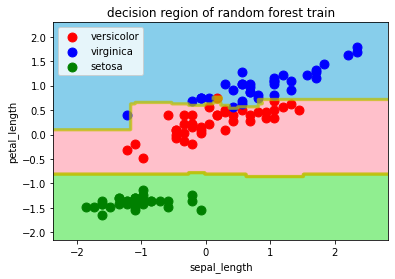

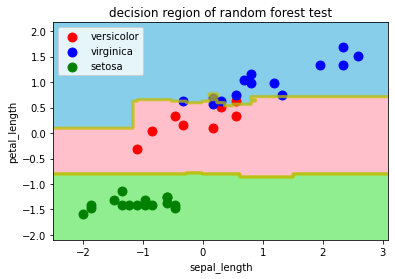

,precision,recall,f1-score,support,accuracy
5-nn,0.848485,0.863095,0.845614,38,0.868421
Logistic Regression,0.909091,0.928571,0.907368,38,0.921053
SVM,0.888889,0.904762,0.877778,38,0.894737
Decision Tree,0.934524,0.934524,0.934524,38,0.947368
random forest,0.900285,0.910714,0.904139,38,0.921053


In [50]:
# 標準化させた場合も試してみる
y_train_number_label  = y_train.replace('versicolor', 0).replace('virginica', 1).replace('setosa', 2)
y_test_number_label  = y_test.replace('versicolor', 0).replace('virginica', 1).replace('setosa', 2)
sc = StandardScaler()
sc.fit(X_train)
X_train_s_scaled = sc.transform(X_train)
X_test_s_scaled = sc.transform(X_test)

compare_result = compare_models_var_3(X_train_s_scaled, y_train_number_label, X_test_s_scaled, y_test_number_label)
compare_result

### 標準化した場合の3種類のアヤメ分類の結果
- 決定木が最も良かった。ただし、おかしな決定領域は存在する。